In [11]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from xgboost import XGBClassifier

import itertools


In [12]:
def isin_filter(df: pd.DataFrame, col: str, values: List):
    return df[df[col].isin(values)]

# filtered_on = list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))
# TODO: finish this one
differentiate_confusion_matrix_over = {
    'was_screened': [
        ([0], lambda df: isin_filter(df, 'was_screened', [0])), 
        ([1], lambda df: isin_filter(df, 'was_screened', [1]))
    ], 
    'ovar_histtype': [
        ([2], lambda df: isin_filter(df, 'ovar_histtype', [2])), 
        ([2, 4, 6, 8, 9, 31], lambda df: isin_filter(df, 'ovar_histtype', [2, 4, 6, 8, 9, 31]))
    ]
}


In [13]:
classifiers = {
    # 'LogisticRegression': LogisticRegression(C= 0.25, random_state= 0),
    # 'GaussianNB': GaussianNB(var_smoothing= 1e-09),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy'),
    # 'RandomForestClassifier': RandomForestClassifier(criterion= 'entropy', n_estimators= 200),
    'XGBClassifier': XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
}

experiment_data_helpers: List[ExperimentDataHelper] = [
    ExperimentDataHelperScreenedOrCancer,
    ExperimentDataHelperScreened,
    ExperimentDataHelperNotScreenedCols,
    ExperimentDataHelperScreenedCols,
    ExperimentDataHelperAll,
    ExperimentDataHelperSingleLabelScreenedOrCancer,
    ExperimentDataHelperSingleLabelScreened,
    ExperimentDataHelperSingleLabelNotScreenedCols,
    ExperimentDataHelperSingleLabelScreenedCols,
    ExperimentDataHelperSingleLabelAll
]

In [14]:
experiment_names = []
years = [1]
num_folds=10
for classifier_name, classifier in classifiers.items():
    for year in years:
        for experiment_data_helper_class in experiment_data_helpers:
            label = f'cancer_in_next_{year}_years'
            filesuffix = f'experiment_{experiment_data_helper_class.get_name()}_{classifier_name}_for_{label}_{num_folds}_trials'
            experiment_names.append(filesuffix)

In [15]:
experiment_names

['experiment_participants_screened_or_cancer_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_participants_screened_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_not_screened_cols_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_screened_cols_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_participants_all_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_participants_screened_or_cancer_single_label_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_participants_screened_single_label_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_not_screened_cols_single_label_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_screened_cols_single_label_XGBClassifier_for_cancer_in_next_1_years_10_trials',
 'experiment_participants_all_single_label_XGBClassifier_for_cancer_in_next_1_years_10_trials']

In [16]:
def load_cv_analytics_util_see_stats(filesuffix):
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    return cv_analytics_util

In [17]:
filesuffix = 'experiment_participants_screened_or_cancer_XGBClassifier_for_cancer_in_next_1_years_10_trials'

In [18]:
cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)

In [19]:
cv_analytics_util.analytics_utils[0].data_util.train_df.columns

Index(['plco_id', 'age', 'agelevel', 'arthrit_f', 'asp', 'asppd', 'bbd',
       'bcontr_f', 'bcontra', 'bcontrt',
       ...
       'uterine_fib', 'visboth', 'viseith', 'visl', 'visr', 'volum',
       'was_screened', 'weight20_f', 'weight50_f', 'weight_f'],
      dtype='object', length=171)



Cross-Validation measures:
+--------------------+-----------+-------+-----------+-----------+
|                    |      mean |   std |       min |       max |
|--------------------+-----------+-------+-----------+-----------|
| precision__class_0 | 0.998879  |   nan | 0.998879  | 0.998879  |
| recall__class_0    | 0.980797  |   nan | 0.980797  | 0.980797  |
| f1-score__class_0  | 0.989755  |   nan | 0.989755  | 0.989755  |
| precision__class_1 | 0.0594796 |   nan | 0.0594796 | 0.0594796 |
| recall__class_1    | 0.52459   |   nan | 0.52459   | 0.52459   |
| f1-score__class_1  | 0.106845  |   nan | 0.106845  | 0.106845  |
| accuracy           | 0.979743  |   nan | 0.979743  | 0.979743  |
| auc                | 0.897939  |   nan | 0.897939  | 0.897939  |
+--------------------+-----------+-------+-----------+-----------+


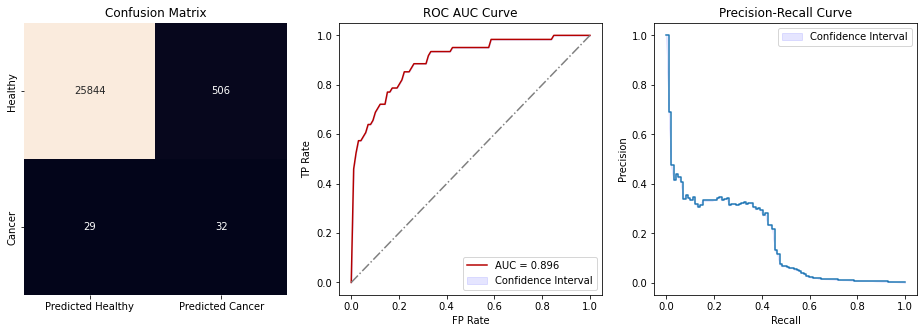

In [20]:
load_cv_analytics_util_see_stats(filesuffix)